In [166]:
# Import Packages
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
# Load Dataset
data = pd.read_csv("./data.csv")

# Display First 30%
percentage = 0.3
data[:int(len(data) * percentage)]



,RSI,Trend,Volume
0,35.597268,-7.140166,812.901009
1,75.784611,5.230213,999.717673
2,1.439349,2.364361,996.636837
3,11.607264,-7.977546,555.431706
4,4.600264,-8.317864,768.987415
5,4.072880,4.019383,944.765730
6,85.546058,-8.544740,849.647391
7,70.365786,6.437201,247.348102
8,47.417383,4.124845,450.544135
9,9.783416,-8.373024,129.159415


In [168]:
rsi = ctrl.Antecedent(np.arange(0, 101, 1), 'rsi')
trend = ctrl.Antecedent(np.arange(-10, 11, 1), 'trend')
volume = ctrl.Antecedent(np.arange(0, 1001, 1), 'volume')
quality = ctrl.Consequent(np.arange(0, 101, 1), 'quality')

In [169]:
# Membership Function
rsi['rendah'] = fuzz.trimf(rsi.universe, [0, 0, 30])
rsi['sedang'] = fuzz.trimf(rsi.universe, [25, 50, 75])
rsi['tinggi'] = fuzz.trimf(rsi.universe, [70, 100, 100])

trend['turun'] = fuzz.trimf(trend.universe, [-10, -10, 0])
trend['stabil'] = fuzz.trimf(trend.universe, [-2, 0, 2])
trend['naik'] = fuzz.trimf(trend.universe, [0, 10, 10])

volume['rendah'] = fuzz.trimf(volume.universe, [0, 0, 400])
volume['sedang'] = fuzz.trimf(volume.universe, [300, 600, 900])
volume['tinggi'] = fuzz.trimf(volume.universe, [700, 1000, 1000])

quality['buruk'] = fuzz.trimf(quality.universe, [0, 0, 40])
quality['sedang'] = fuzz.trimf(quality.universe, [30, 50, 70])
quality['bagus'] = fuzz.trimf(quality.universe, [60, 100, 100])

C:\Users\User\anaconda3\envs\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


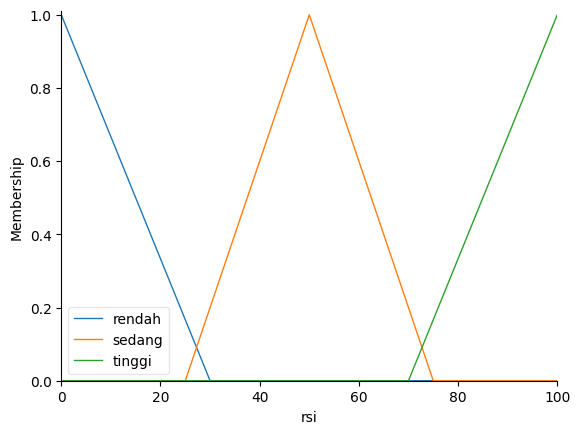

In [170]:
# Plot Membership RSI
rsi.view()
plt.show()

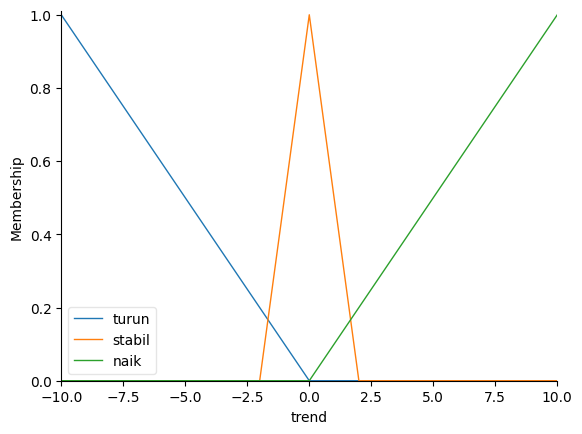

In [171]:
# Plot Membership Trend
trend.view()
plt.show()

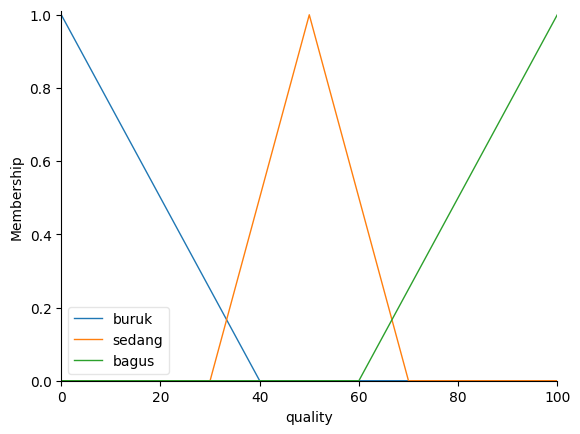

In [172]:
# Plot Membership Quality
quality.view()
plt.show()

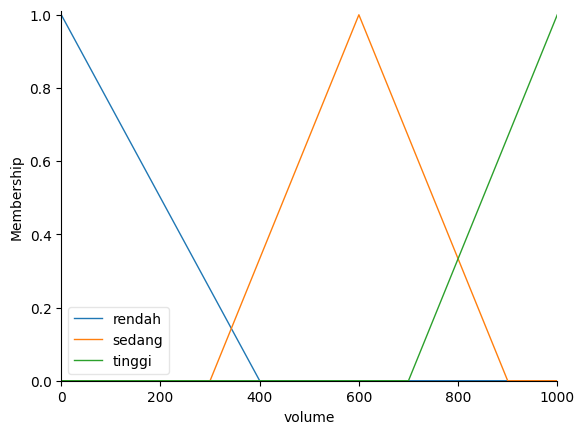

In [173]:
# Plot Membership Keputusan
volume.view()
plt.show()

In [174]:
# Aturan

rules = [
    ctrl.Rule(rsi['rendah'] & trend['turun'] & volume['rendah'], quality['buruk']),
    ctrl.Rule(rsi['rendah'] & trend['turun'] & volume['sedang'], quality['sedang']),
    ctrl.Rule(rsi['rendah'] & trend['turun'] & volume['tinggi'], quality['sedang']),
    ctrl.Rule(rsi['rendah'] & trend['stabil'] & volume['rendah'], quality['sedang']),
    ctrl.Rule(rsi['rendah'] & trend['stabil'] & volume['sedang'], quality['bagus']),
    ctrl.Rule(rsi['rendah'] & trend['stabil'] & volume['tinggi'], quality['bagus']),
    ctrl.Rule(rsi['rendah'] & trend['naik'] & volume['rendah'], quality['sedang']),
    ctrl.Rule(rsi['rendah'] & trend['naik'] & volume['sedang'], quality['bagus']),
    ctrl.Rule(rsi['rendah'] & trend['naik'] & volume['tinggi'], quality['bagus']),

    ctrl.Rule(rsi['sedang'] & trend['turun'] & volume['rendah'], quality['buruk']),
    ctrl.Rule(rsi['sedang'] & trend['turun'] & volume['sedang'], quality['sedang']),
    ctrl.Rule(rsi['sedang'] & trend['turun'] & volume['tinggi'], quality['sedang']),
    ctrl.Rule(rsi['sedang'] & trend['stabil'] & volume['rendah'], quality['sedang']),
    ctrl.Rule(rsi['sedang'] & trend['stabil'] & volume['sedang'], quality['sedang']),
    ctrl.Rule(rsi['sedang'] & trend['stabil'] & volume['tinggi'], quality['bagus']),
    ctrl.Rule(rsi['sedang'] & trend['naik'] & volume['rendah'], quality['sedang']),
    ctrl.Rule(rsi['sedang'] & trend['naik'] & volume['sedang'], quality['bagus']),
    ctrl.Rule(rsi['sedang'] & trend['naik'] & volume['tinggi'], quality['bagus']),

    ctrl.Rule(rsi['tinggi'] & trend['turun'] & volume['rendah'], quality['buruk']),
    ctrl.Rule(rsi['tinggi'] & trend['turun'] & volume['sedang'], quality['buruk']),
    ctrl.Rule(rsi['tinggi'] & trend['turun'] & volume['tinggi'], quality['buruk']),
    ctrl.Rule(rsi['tinggi'] & trend['stabil'] & volume['rendah'], quality['buruk']),
    ctrl.Rule(rsi['tinggi'] & trend['stabil'] & volume['sedang'], quality['sedang']),
    ctrl.Rule(rsi['tinggi'] & trend['stabil'] & volume['tinggi'], quality['sedang']),
    ctrl.Rule(rsi['tinggi'] & trend['naik'] & volume['rendah'], quality['sedang']),
    ctrl.Rule(rsi['tinggi'] & trend['naik'] & volume['sedang'], quality['bagus']),
    ctrl.Rule(rsi['tinggi'] & trend['naik'] & volume['tinggi'], quality['bagus'])
]

# Control System
quality_ctrl = ctrl.ControlSystem(rules)


In [175]:
# Function to compute stock quality
def compute_stock_quality(row):
    # Create a new simulation instance for each row
    stock_quality_simulation = ctrl.ControlSystemSimulation(quality_ctrl)

    # Initialize variables
    rsi_value = None
    trend_value = None
    volume_value = None

    try:
        # Set input values
        rsi_value = row['RSI']
        trend_value = row['Trend']
        volume_value = row['Volume']

        # Clip inputs to universes
        rsi_value = np.clip(rsi_value, rsi.universe[0], rsi.universe[-1])
        trend_value = np.clip(trend_value, trend.universe[0], trend.universe[-1])
        volume_value = np.clip(volume_value, volume.universe[0], volume.universe[-1])

        # Set inputs
        stock_quality_simulation.input['rsi'] = rsi_value
        stock_quality_simulation.input['trend'] = trend_value
        stock_quality_simulation.input['volume'] = volume_value

        # Compute the fuzzy result
        stock_quality_simulation.compute()

        # Return the output value for quality
        return stock_quality_simulation.output['quality']

    except Exception as ex:
        print(f"[Error] Baris ke-{row.name}: {ex}")
        print(f"  Inputs -> RSI={rsi_value}, Trend={trend_value}, Volume={volume_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['stock_quality_score'] = data.apply(compute_stock_quality, axis=1)

In [176]:
data.head()

,RSI,Trend,Volume,stock_quality_score
0,35.597268,-7.140166,812.901009,50.000000
1,75.784611,5.230213,999.717673,81.859626
2,1.439349,2.364361,996.636837,82.258700
3,11.607264,-7.977546,555.431706,50.000000
4,4.600264,-8.317864,768.987415,50.000000


In [177]:
def label_quality(score):
    if score < 40:
        return 'Buruk'
    elif score < 70:
        return 'Sedang'
    else:
        return 'Bagus'

data['Predicted_Quality_Label'] = data['stock_quality_score'].apply(label_quality)


In [178]:
# Urutkan saham berdasarkan skor kualitas tertinggi
top_stocks = data.sort_values(by='stock_quality_score', ascending=False)

# Simpan hasil ke file CSV
top_stocks.to_csv('./dataBaru.csv', index=False)

# Tampilkan 10 saham teratas (dengan kategori kualitas)
top_stocks[['RSI', 'Trend', 'Volume', 'stock_quality_score', 'Predicted_Quality_Label']].head(10)


,RSI,Trend,Volume,stock_quality_score,Predicted_Quality_Label
11,47.347177,9.732792,606.174634,86.530937,Bagus
82,95.060715,8.654570,627.900389,86.356331,Bagus
78,90.538198,8.995998,503.417271,85.621266,Bagus
94,5.755876,6.766574,618.254772,85.613269,Bagus
93,49.442030,6.842378,484.522985,85.240200,Bagus
14,39.850473,6.255991,618.128240,85.103624,Bagus
20,50.313626,5.542938,520.163501,84.834538,Bagus
44,7.118865,0.554022,862.363709,84.742822,Bagus
17,4.530401,5.067564,671.573196,84.494310,Bagus
47,2.327194,1.077086,926.587625,84.153220,Bagus


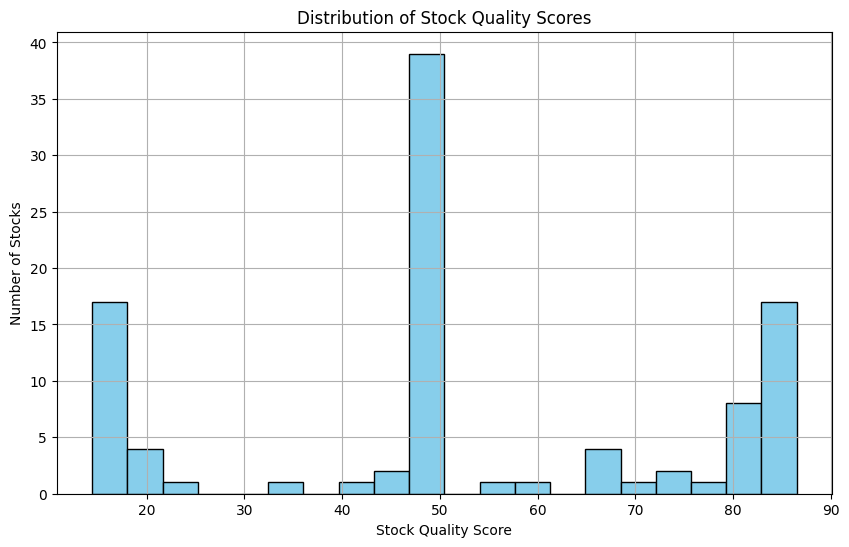

In [179]:
# Plot distribusi skor kualitas saham
plt.figure(figsize=(10, 6))
plt.hist(data['stock_quality_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Stock Quality Scores')
plt.xlabel('Stock Quality Score')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()


Stock Quality Category Counts:
Predicted_Quality_Label
Sedang    48
Bagus     29
Buruk     23
Name: count, dtype: int64


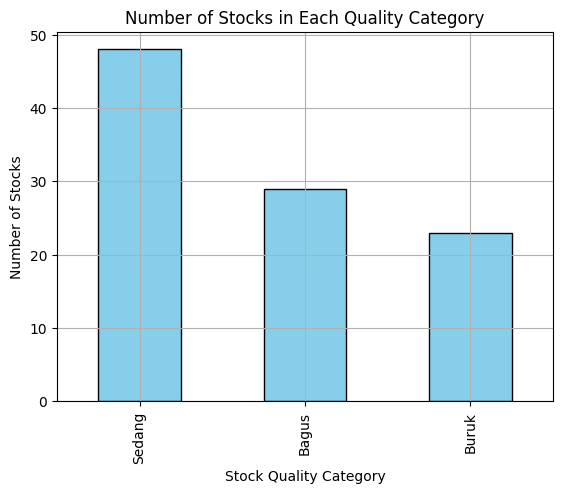

In [180]:
# Hitung jumlah saham dalam tiap kategori
category_counts = data['Predicted_Quality_Label'].value_counts()
print("Stock Quality Category Counts:")
print(category_counts)

# Plot jumlah saham per kategori
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Stocks in Each Quality Category')
plt.xlabel('Stock Quality Category')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()


In [181]:
# num_rows = 100  

# # Generate data random baru
# data = pd.DataFrame({
#     'RSI': np.random.uniform(0, 100, num_rows),
#     'Trend': np.random.uniform(-10, 10, num_rows),
#     'Volume': np.random.uniform(0, 1000, num_rows)
# })

# # Simpan ke CSV
# data.to_csv('./data.csv', index=False)

# print("Dataset acak berhasil dibuat dan disimpan sebagai 'random_stock_data.csv'")
# print(data.head())